### Importing libraries and data

In [1]:
import pandas as pd### Importing libraries and data
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from datasets import load_dataset

data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Filter the Data Analyst jobs for United States and drop the null values

In [2]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] =='Data Analyst')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

### Explode the skills

In [3]:
df_DA_US_explode = df_DA_US.explode('job_skills')
df_DA_US_explode[['salary_year_avg','job_skills']].head(6)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
180,90250.0,powerpoint


### Group by job skills to get median salary and count of skills for each job

Get the top demanded skills.

In [4]:
df_DA_skills = df_DA_US_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count', 'median': 'median_salary'})

df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


### Calculate the percentage of skills in job postings

In [5]:
DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count']/ DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


### Plot the median salary vs percent of skill demand

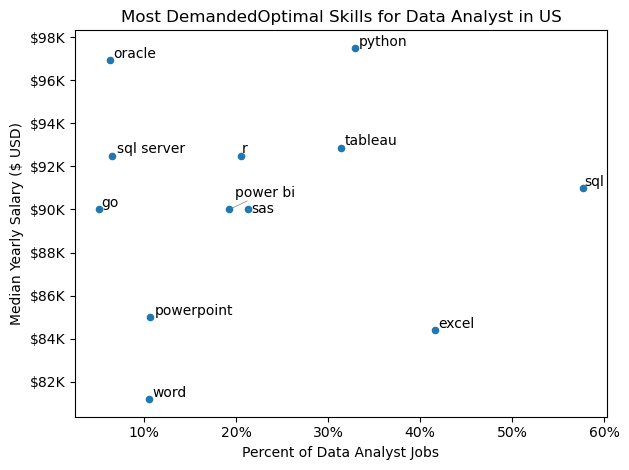

In [6]:
from adjustText import adjust_text 
from matplotlib.ticker import PercentFormatter

df_DA_skills_high_demand.plot(kind='scatter',x='skill_percent', y='median_salary')
plt.title('Most DemandedOptimal Skills for Data Analyst in US')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($ USD)')

texts = []

for i , txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=0.5))    

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()

### Get the technology domain with skills for each job posting and aggregate them

In [7]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['datarobot',
  'spss',
  'cognos',
  'ssrs',
  'outlook',
  'microstrategy',
  'ssis',
  'looker',
  'word',
  'splunk',
  'dax',
  'visio',
  'esquisse',
  'sharepoint',
  'tableau',
  'power bi',
  'sas',
  'excel',
  'msaccess',
  'sheets',
  'alteryx',
  'sap',
  'nuix',
  'powerpoint',
  'ms access',
  'spreadsheet',
  'qlik',
  'powerbi'],
 'programming': ['go',
  'haskell',
  'mongodb',
  'nosql',
  'matlab',
  'sass',
  'java',
  'clojure',
  'rust',
  'sql',
  'css',
  'ruby',
  'visual basic',
  'powershell',
  'elixir',
  'delphi',
  'python',
  'perl',
  'apl',
  'objective-c',
  'swift',
  'bash',
  'php',
  'no-sql',
  'groovy',
  'erlang',
  'solidity',
  'r',
  'c#',
  'dart',
  'lua',
  'assembly',
  'mongo',
  'pascal',
  'html',
  'lisp',
  'c',
  'cobol',
  'sas',
  'ocaml',
  'julia',
  'f#',
  'crystal',
  'javascript',
  'visualbasic',
  'typescript',
  'kotlin',
  'fortran',
  'golang',
  'c++',
  'scala',
  'vb.net',
  'shell',
  't-sql',
  '

### Convert the technology list to dataframe

In [8]:
df_technology = pd.DataFrame(list(technology_dict.items()),columns=['technology','skills']) 


### Explode the skills for technology dataframe

In [9]:
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,datarobot
0,analyst_tools,spss
0,analyst_tools,cognos
0,analyst_tools,ssrs
0,analyst_tools,outlook
...,...,...
9,sync,ringcentral
9,sync,twilio
9,sync,webex
9,sync,symphony


### Merge the median salary with job skills dataframe to technology with job skills dataframe

In [10]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

### Plot the median salary vs percent of skill demand grouped by technology

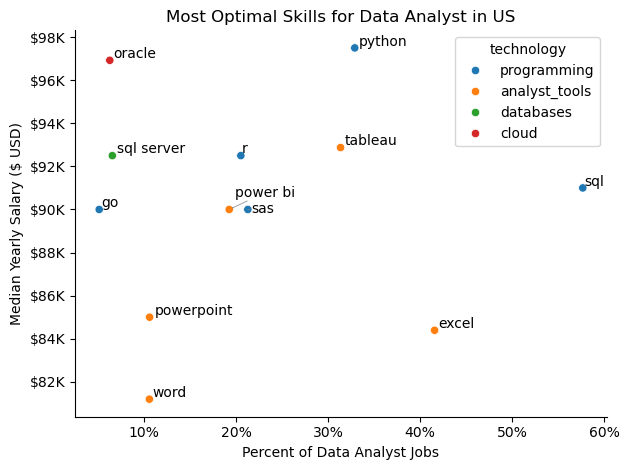

In [11]:
from adjustText import adjust_text 
from matplotlib.ticker import PercentFormatter

#df_DA_skills_high_demand.plot(kind='scatter',x='skill_percent', y='median_salary')

sns.scatterplot(df_plot, x='skill_percent', y='median_salary', hue='technology')

plt.title('Most Optimal Skills for Data Analyst in US')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($ USD)')

texts = []

for i , txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=0.5))    

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

sns.despine()
plt.tight_layout()
plt.show()